# Signal Processing Guest Lecture

### **Tirtadwipa Manunggal**
##### Fullstack Engineer @ SPIKA Play Italy

## Waves

Let's take a look at this audio. At a glance, this audio seems chaotic and likely hard to extract the information. But when we zoom bigger at certain range of index, we can obviously see a pattern. The signal has a **periodic** pattern and smoothly sweeps into other **periodic** pattern.

**Import scipy, matplotlib, and other libraries**

In [ ]:
!rm -rf repo
!git clone https://github.com/linerocks/its-guess-lecture-2021.git repo
!pip install librosa

In [2]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display

**Read audio**

In [ ]:
fs, x = wav.read('repo/data/audio.wav')
Audio(data=x,rate=fs)

**Plot audio wave**

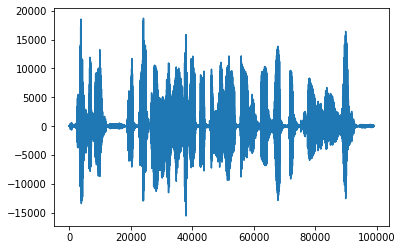

In [4]:
plt.plot(x)

**Zoom the plot**

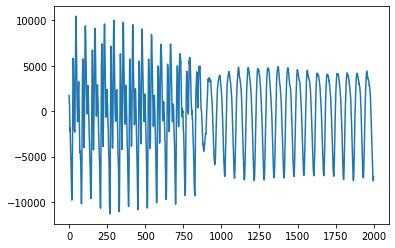

In [5]:
plt.plot(x[28000:30000])
plt.rcParams['figure.figsize'] = (10, 4)

Speaking of which audio originated from, we should revisit it as a waves or signal (the term is used interchangeably). As like we hypen previously, **periodic pattern** is the key for processing waves. Yet, before dive into **polytone pattern**, we need to step back a little and try building our wave from scratch so that we grasp better understanding about **periodic pattern**. Let's do some math <sup><a href='#1'>[1]</a></sup>.

$$ y = f(t) = A \ sin(\omega t) \ = A \ sin(2 \pi ft)$$

where 
$A$ is signal amplitude, $f$ is frequency, **$t$** is time index. Or we  can code as follows,

**Import numpy**

In [6]:
import numpy as np

**Define constants needed**

In [7]:
t = np.linspace(0, 1, fs)  # samples
A = 1                      # arbitrary unit
f = 220                    # Hz

**Create simple wave**

In [8]:
y = A * np.sin(2 * np.pi * f * t)

**Plot the wave**

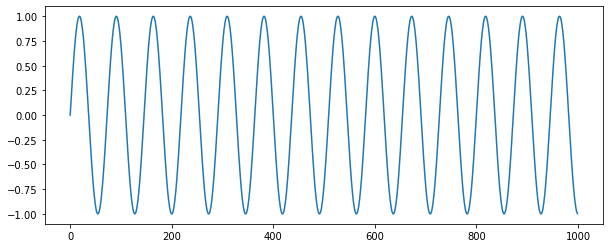

In [9]:
plt.plot(y[0:1000])

**Play the wave**

In [ ]:
Audio(data=y, rate=fs)

We can play further by adding other frequency components and adjusting the amplitude. Suppose we are creating mixture wave with $f_1 = 220\ Hz$ and $f_2 = 600\ Hz$ which weighted 0.6 and 0.4 for $A1$ and $A2$ respectively or notated as

$$y_m = A_1 \ sin(2 \pi f_1 t) + A_2 \ sin(2 \pi f_2 t)$$

**Define our mixture components**

In [11]:
A1 = 0.6
f1 = 220
A2 = 0.4
f2 = 600

**Create our compound wave**

In [12]:
y_m = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t)

**Plot the wave**

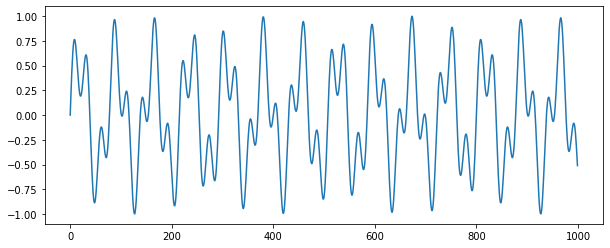

In [13]:
plt.plot(y_m[0:1000])

**Play the wave**

In [ ]:
Audio(data=y_m, rate=fs)

Let's having fun a while.

In [15]:
def music_score(score):
    y = np.zeros(0)
    for i in score:
        t = np.linspace(0, 1, i[1] * 16) # milisecond
        x = np.sin(2 * np.pi * i[0] * t)
        y = np.append(y, x)
    return y    

In [ ]:
# Do re mi
score = [
    [440, 1500],     # A4
    [493.16, 1500],  # B4
    [554.25, 1500],  # C5
    [587.33, 1500],  # D5
    [659.25, 1500],  # E5
    [739.98, 1500],  # F5
    [830.61, 1500],  # G5
    [880.00, 1500],  # A5
]
y_doremi = music_score(score)
Audio(data=y_doremi,rate=44100)

In [ ]:
# Super Mario
score = [
    [330.0, 200], [0.0, 300], [330.0, 200], [0.0, 600], [330.0, 200], [0.0, 600], [255.0, 200], [0.0, 200], [330.0, 200], [0.0, 600], [385.0, 200], [0.0, 1100], [190.0, 200], [0.0, 1150], [255.0, 200], [0.0, 900], [190.0, 200], [0.0, 800], [160.0, 200], [0.0, 1000], [220.0, 200], [0.0, 600], [240.0, 160], [0.0, 660], [225.0, 200], [0.0, 300], [215.0, 200], [0.0, 600], [190.0, 200], [0.0, 400], [330.0, 160], [0.0, 400], [380.0, 100], [0.0, 300], [430.0, 200], [0.0, 600], [350.0, 160], [0.0, 300], [380.0, 100], [0.0, 700], [330.0, 160], [0.0, 600], [260.0, 160], [0.0, 300], [290.0, 160], [0.0, 300], [240.0, 160], [0.0, 1000], [255.0, 200], [0.0, 900], [190.0, 200], [0.0, 800], [160.0, 200], [0.0, 1000], [220.0, 200], [0.0, 600], [240.0, 160], [0.0, 660], [225.0, 200], [0.0, 300], [215.0, 200], [0.0, 600], [190.0, 200], [0.0, 400], [330.0, 160], [0.0, 400], [380.0, 100], [0.0, 300], [430.0, 200], [0.0, 600], [350.0, 160], [0.0, 300], [380.0, 100], [0.0, 700], [330.0, 160], [0.0, 600], [260.0, 160], [0.0, 300], [290.0, 160], [0.0, 300], [240.0, 160], [0.0, 1000], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 300], [0.0, 600], [190.0, 200], [0.0, 300], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 200], [285.0, 200], [0.0, 440], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 400], [0.0, 600], [510.0, 160], [0.0, 600], [510.0, 160], [0.0, 300], [510.0, 160], [0.0, 600], [190.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 300], [0.0, 600], [190.0, 200], [0.0, 300], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 200], [285.0, 200], [0.0, 840], [292.5, 200], [0.0, 900], [275.0, 200], [0.0, 840], [250.0, 200], [0.0, 720], [190.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [250.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 300], [0.0, 600], [190.0, 200], [0.0, 300], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 200], [285.0, 200], [0.0, 440], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 400], [0.0, 600], [510.0, 160], [0.0, 600], [510.0, 160], [0.0, 300], [510.0, 160], [0.0, 600], [190.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 300], [0.0, 600], [190.0, 200], [0.0, 300], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 200], [285.0, 200], [0.0, 840], [292.5, 200], [0.0, 900], [275.0, 200], [0.0, 840], [250.0, 200], [0.0, 720], [190.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [250.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [250.0, 120], [0.0, 300], [250.0, 160], [0.0, 600], [250.0, 120], [0.0, 700], [250.0, 160], [0.0, 300], [290.0, 160], [0.0, 700], [330.0, 160], [0.0, 300], [250.0, 160], [0.0, 600], [215.0, 160], [0.0, 300], [190.0, 160], [0.0, 1200], [250.0, 120], [0.0, 300], [250.0, 160], [0.0, 600], [250.0, 120], [0.0, 700], [250.0, 160], [0.0, 300], [290.0, 160], [0.0, 300], [330.0, 160], [0.0, 1100], [435.0, 160], [0.0, 650], [380.0, 160], [0.0, 1200], [250.0, 120], [0.0, 300], [250.0, 160], [0.0, 600], [250.0, 120], [0.0, 700], [250.0, 160], [0.0, 300], [290.0, 160], [0.0, 700], [330.0, 160], [0.0, 300], [250.0, 160], [0.0, 600], [215.0, 160], [0.0, 300], [190.0, 160], [0.0, 1200], [330.0, 200], [0.0, 300], [330.0, 200], [0.0, 600], [330.0, 200], [0.0, 600], [255.0, 200], [0.0, 200], [330.0, 200], [0.0, 600], [385.0, 200], [0.0, 1100], [190.0, 200], [0.0, 1150]
]
y_mario = music_score(score)
Audio(data=y_mario,rate=44100)

## Transformation : Fourier Transform

As we start speaking about frequency, we have to deal the frequency within the audio signal using such a representation to make data less chaotic. _**Joseph Fourier**_ introduced such series which later derived a methods namely _**Fourier Transform**_. This method breaks down the frequency components into an orthogonal series representing th e audio. _**Fourier Transform**_ is noted as
$$F(k) = \frac{1}{T}\ \int_{-\frac{T}{2}}^{\frac{T}{2}} f(t)\ e^{-2\pi\ i\ \frac{k}{T}\ t}\ dt$$
where :<br>

- $f(t)$ is time-domain function (_simply_ our signal)
- $e$ is Euler's number 2.718281828459....
- $k$ is frequency index
- $i$ is imaginary number for $\sqrt{-1}$ (or sometimes people use literal $j$ a.k.a. _jmaginary_ :D)
- $T$ is time period

But let's leave all the hassle this part and use numpy **Fourier Transform** instead. Note that **Fourier Transform** yields _complex number_ so the result has _real_ and _imaginary_ component. In addition, the yielded spectrum is <a href="https://en.wikipedia.org/wiki/Hermitian_function"><i>conjugate symmetric</i></a>. Thus, we need to turn the _complex number_ into it's absolute form and cut into a half.

If we want to be more accurate, finding absolute form of spectrum should be calculated as power,

$$P(k) = F(k)\ F(k)^{*}$$

Asterix sign notes conjugation. But we will leave it for simplicity.

**Transform the monotone signal**

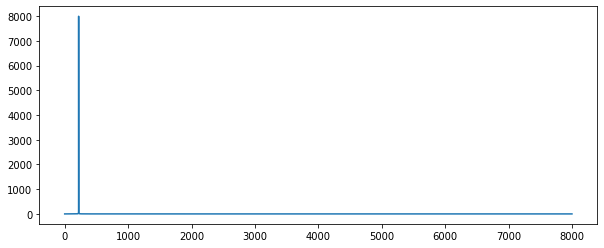

In [18]:
# Monotone signal
Y = np.abs(np.fft.fft(y))
plt.plot(Y[0:np.int(Y.size/2)])

**Transform the dualtone signal**

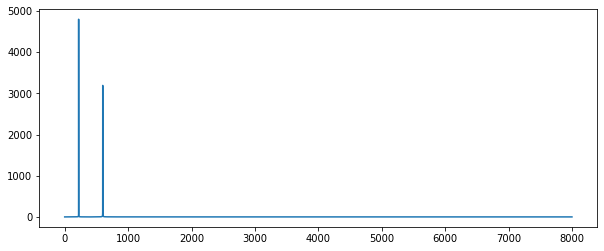

In [19]:
# Dualtone signal
Y_m = np.abs(np.fft.fft(y_m))
plt.plot(Y_m[0:np.int(Y_m.size/2)])

**Transform polytone signal**

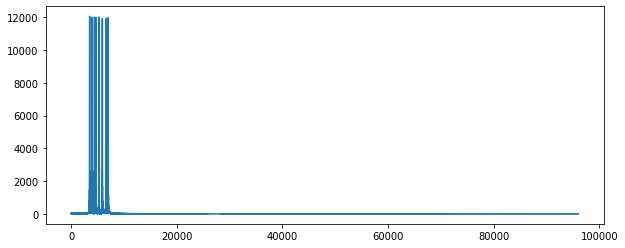

In [20]:
# Doremi signal
Y_doremi = np.abs(np.fft.fft(y_doremi))
plt.plot(Y_doremi[0:np.int(Y_doremi.size/2)])

**Transform the monotone signal**

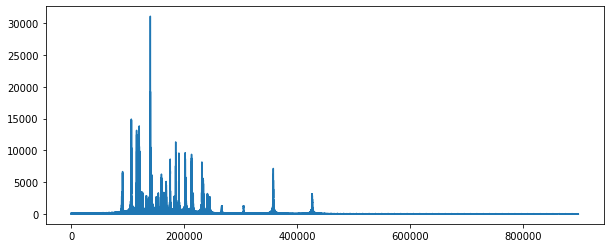

In [21]:
# Mario signal
Y_mario = np.abs(np.fft.fft(y_mario))
plt.plot(Y_mario[0:np.int(Y_mario.size/2)])

**Transform the speech**

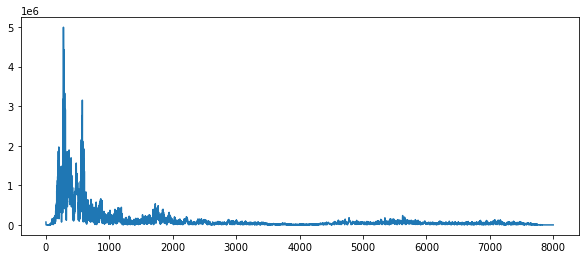

In [22]:
# Speech signal
X = np.abs(np.fft.fft(x[1:fs]))
plt.plot(X[0:np.int(X.size/2)])

## Transformation : Short Time Fourier Transform

Applying **Fourier Transform** upon a signal would diminish temporal information as the time index $t$ turns into frequency index $k$. In point of fact, this temporal information can be extremely useful if come along the spectral information. It's why people come across a method coping this idea. The method is renownedly called **Short Time Fourier Transform**. Instead of transforming whole signal at once, we split the signal into smaller chunk overlapping each other and transform each chunk locally. STFT workflow is best described by figure below,

![figure1](https://github.com/linerocks/its-guess-lecture-2021/blob/master/img/fig1.png?raw=1)

<sub><b>figure 1</b> : image is taken from  http://inacl.id/journal/index.php/jlk/article/view/2</sub>


STFT has hopping distance constants for each chunk which is therefore managed by time frame, yet each hop need to be weighed by a **window function** so that transition of one chunk to next door chunk can be reunited well later. 

Here we introduce term **window function**. Frankly describing, **window function** is a weighing function. There are a lot of **window function** and every of them has unique characteristic. For this tutorial, we will pick one which is well-know and widely used, **Hamming Window** <sup><a href='#2'>[2]</a></sup> which is defined as,
$$H[n] = 0.54 - 0.46\ cos \left[ \frac{2\pi n}{N - 1} \right]$$

**Define our frame size**

In [23]:
# Our constant for frame size
N = 512

**Create arbitrary signal**

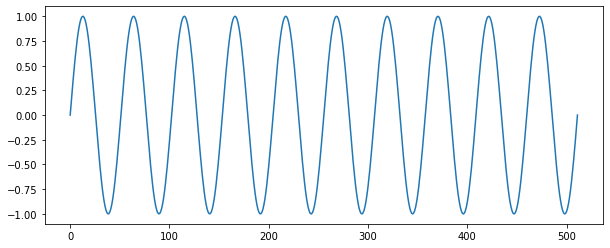

In [24]:
# Arbitrary wave
chunk = np.sin(2 * np.pi * 10 * np.linspace(0, 1, N))
plt.plot(chunk)

**Create our window**

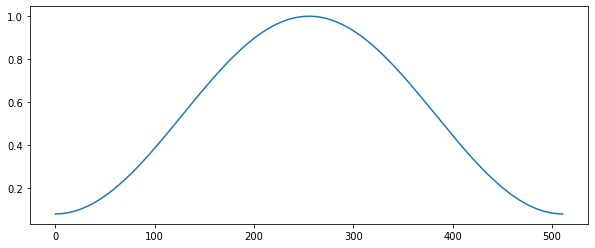

In [25]:
# Window function
H = 0.54 - 0.46 *  np.cos(np.arange(0, N) * 2 * np.pi / (N - 1))
plt.plot(H)

**Apply the window**

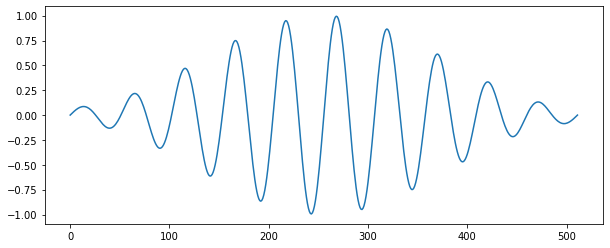

In [26]:
# Windowed wave
frame = np.multiply(chunk, H)
plt.plot(frame)

Moving on to advanced step, let's chunk our audio for real.

**Wrap STFT into a function**

In [27]:
def STFT(x, N = 512, overlap = 0.5) :
    if overlap > 0.5 :
        overlap = 0.5
    elif overlap < 0.1 :
        overlap = 0.1
    
    # Calculating frames
    hop_size     = np.int( np.floor(N * (1 - overlap)) )
    total_frames = np.int( np.ceil(x.size / hop_size) )
    
    # Zero padding
    x = np.append( x, np.zeros((total_frames + 1) * hop_size - x.size) )
    
    # STFT container
    result = np.empty( (total_frames, np.int(N/2)), dtype=np.float32 )
    
    # Window
    H = 0.54 - 0.46 *  np.cos(np.arange(0, N) * 2 * np.pi / (N - 1))
        
    # Building
    for i in range(total_frames) :
        hop_index    = i * hop_size
        chunk        = x[hop_index : hop_index + N]
        frame        = np.multiply(chunk, H)
        spectrum     = np.abs(np.fft.fft(frame))
        result[i, :] = spectrum[0:np.int(N/2)]
    
    return result   

**View doremi spectrogram**

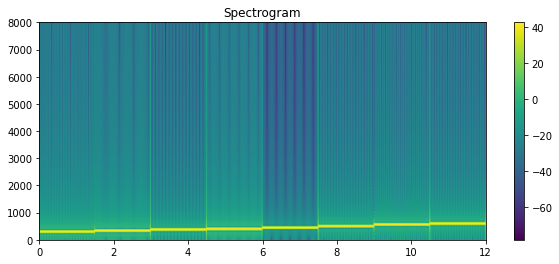

In [28]:
# Spectrogram of doremi
spectrum = 20 * np.log10(STFT(y_doremi))
plt.imshow(spectrum.T, origin='lower', aspect='auto', extent=[0, spectrum.size / fs, 0, 8000])
plt.title('Spectrogram')
plt.colorbar()

**View speech spectrogram**

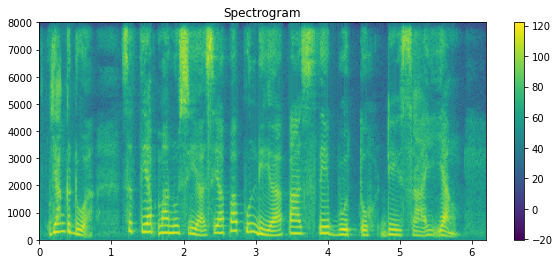

In [29]:
# Spectrogram of audio file
spectrum = 20 * np.log10(STFT(x))
plt.imshow(spectrum.T, origin='lower', aspect='auto', extent=[0, spectrum.size / fs, 0, 8000])
plt.title('Spectrogram')
plt.colorbar()

## Features : MFCC

Data representation plays major role on any speech system especially in speech recognition. Apart from spectrogram which is still oversized as a feature, **Mel-Frequency Cepstral Coefficients (MFCC)** were very popular. In a nutshell, spectrogram is processed further as a **band** representing the frequency distribution. Simply speaking, each frequency part in spectrogram is grouped. The group category might be linear or non-linear. Take a look at equalizer figure below,

![figure2](https://github.com/linerocks/its-guess-lecture-2021/blob/master/img/fig2.png?raw=1)

<sub><b>figure 2</b> : image is taken from  https://community.spotify.com/t5/Closed-Ideas/Desktop-Equalizer-for-the-Desktop-Version/idi-p/1207205</sub>

But obviously it is not as easy as grouping bands. The procedure of obtaining MFCC is usually depicted in following steps,

![figure3](https://github.com/linerocks/its-guess-lecture-2021/blob/master/img/fig3.png?raw=1)

<sub><b>figure 3</b> : image is taken from  http://recognize-speech.com/feature-extraction/mfcc</sub>

As we had finished the spectrogram part, now we jump into **Mel Scaling** and the rest. Let's start by the definition of **Mel Scale**. The <a href="https://en.wikipedia.org/wiki/Mel_scale"><b>Mel Scale</b></a> aims to mimic the non-linear human ear perception of sound (see <a href="https://en.wikipedia.org/wiki/Hair_cell">Cochlear Hair Cells</a>), by being discriminative at lower frequencies and less discriminative at higher frequencies.

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/dyenMluFaUw?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

Until this step, the frequency unit is in Hertz (Hz). We can convert between Hz ($f$) and Mel ($m$) using following equations :
$$m = 2595\ \log_{10}\left(1 + \frac{f}{700}\right)$$
$$f = 700\left(10^{\frac{m}{2595}}\ -\ 1\right)$$
This mel scale is applied to our spectrogram as a filter bank which look like,

![figure4](https://github.com/linerocks/its-guess-lecture-2021/blob/master/img/fig4.jpg?raw=1)

<sub><b>figure 4</b> : image is taken from  http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html</sub>

Each filter in the filter bank is triangular shaped and ranging from 0 to 1.The center frequency has amplitude 1 and surrounding frequencies decrease gradually towards 0 till it intersect the adjacent filters. These filters can be mathematically modelled as <sup><a href='#3'>[2]</a></sup>

$$H_m(k) =
  \begin{cases}
      \hfill 0                                      \hfill & k < f(m - 1) \\
      \\
      \hfill \dfrac{k - f(m - 1)}{f(m) - f(m - 1)}  \hfill & f(m - 1) \leq k < f(m) \\
      \\
      \hfill 1                                      \hfill & k = f(m) \\
      \\
      \hfill \dfrac{f(m + 1) - k}{f(m + 1) - f(m)}  \hfill & f(m) < k \leq f(m + 1) \\
      \\
      \hfill 0                                      \hfill & k > f(m - 1) \\
  \end{cases}$$
  
No need to reinvent the wheel, we only use the implementation of the equation as shown in <a href="http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html">here</a> with a little modification.

In [31]:
def filterbank(NFFT = 512, nfilt = 40, fs = 16000) :
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (fs / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / fs)
    
    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    return fbank.T

**Apply the filter bank**

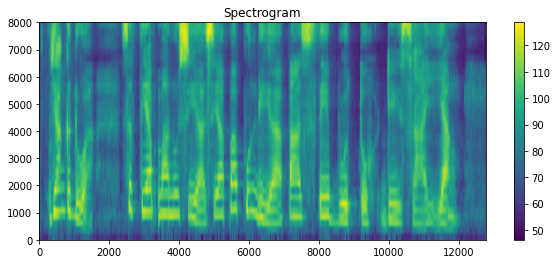

In [32]:
# Filterbank Spectrogram
spectrogram = np.dot(STFT(x), filterbank(N, nfilt=33, fs = fs))
spectrogram = 20 * np.log10(spectrogram)
plt.imshow(spectrogram.T, origin='lower', aspect='auto', extent=[0, spectrogram.size, 0, 8000])
plt.title('Spectrogram')
plt.colorbar()

![figure5](https://github.com/linerocks/its-guess-lecture-2021/blob/master/img/fig5.gif?raw=1)

As mentioned before in figure 3, the next step is undergoing _Discrete Cosine Transform (DCT)_, scrapping $n$ number of coefficient, and liftering (see <a href="https://maxwell.ict.griffith.edu.au/spl/publications/papers/euro99_kkp_fbe.pdf">lifter</a>) the coefficient matrix. Commonly used lifter is notated as,
$$l_i = 1 + \frac{D}{2}\sin\left(\frac{\pi i}{D}\right) $$

**Create our lifter**

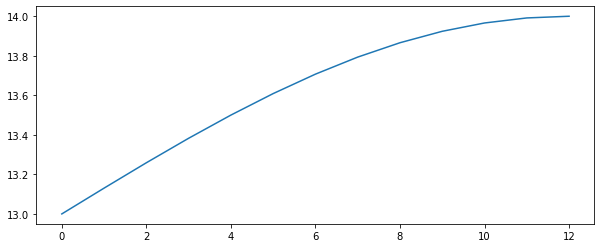

In [33]:
# Lifter for ncoeff = 13 and D = 24
ncoeff = 13
D = 24
lifter = 1 + (D/2) + np.sin(np.pi * np.arange(ncoeff) / D)
plt.plot(lifter)

**Wrap up our mfcc into function**

In [34]:
from scipy import fftpack
def mfcc(x, N = 512, ncoeff = 13, D = 24, fs = 16000):
    spectrogram = np.dot(STFT(x), filterbank(N, fs = fs))
    spectrogram = 20 * np.log10(spectrogram)
    mfcc = fftpack.dct(spectrogram, type = 2, axis = 1, norm = 'ortho')[:, 1 : (ncoeff + 1)]
    lifter = 1 + (D/2) + np.sin(np.pi * np.arange(ncoeff) / D)
    mfcc = np.multiply(mfcc, lifter)
    return mfcc

**Test the MFCC**

In [35]:
x, fs = librosa.load('repo/data/audio.wav')

(87, 13)


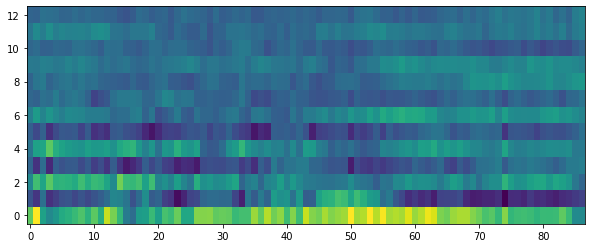

In [36]:
MFCC = mfcc(x[0:fs])
print(MFCC.shape)
plt.imshow(MFCC.T, origin='lower', aspect='auto')

MFCCs oftenly came along with their delta ($\Delta$) and double delta ($\Delta^{2}$) to enhance feature robustness.

**Calculate the delta feature**

(86, 13)


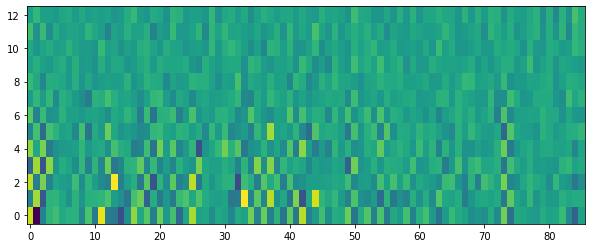

In [37]:
delta = np.diff(MFCC, axis=0)
print(delta.shape)
plt.imshow(delta.T, origin='lower', aspect='auto')

**Calculate the double delta**

(85, 13)


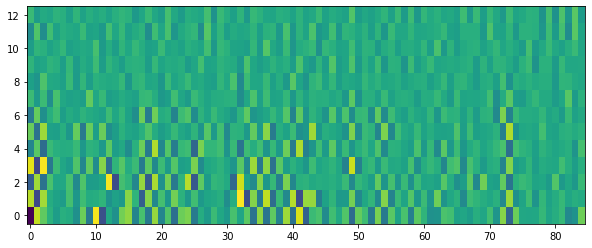

In [38]:
double_delta = np.diff(delta, axis=0)
print(double_delta.shape)
plt.imshow(double_delta.T, origin='lower', aspect='auto')

That's it for the speech feature extraction introduction. Now let's get into the fun part - the machine learning.


---



## Supervised Machine Learning

![](https://github.com/linerocks/its-guess-lecture-2021/blob/master/img/SupervisedLearning.png?raw=1)

The basic principle used by a number of machine and deep learning  algorithms is called supervised learning. You can think of it as learning from mistakes, since it uses iterative procedure to find a minimum of PREDICTION ERROR of a machine learning model for the given training data.

The error is usually expressed as a difference between output predicted by the model and actual/target output which is given as a part of training data.  This error is calculated using so called LOSS FUNCTION.

Mathematical procedure for finding minimum of the error/loss function is known as OPTIMIZATION METHOD.  Following this general outline as shown in picture bellow, different machine learning algorithms can be implemented using different models, loss functions and optimization methods.

This includes linear regression, logistic regression, feed forward and convolutional neural networks which are explained above.


In [39]:
!pip install tqdm

import librosa
from librosa import display
from IPython.display import Audio
import os
import pandas as pd
import glob
from tqdm import tqdm
import numpy as np
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
!rm -rf * sample_data
!wget https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1 -O dataset.zip
!unzip dataset.zip && rm dataset.zip && mkdir dataset
!for i in Actor*; do mv $i/* dataset/. && rm -rf $i; done

**File naming convention**

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

Filename identifiers 

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition). 
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

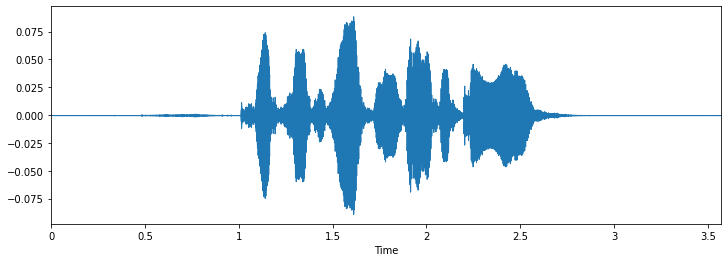

In [41]:
filename='dataset/03-01-06-01-01-01-22.wav'
data, sampling_rate = librosa.load(filename)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
Audio(data=data,rate=sampling_rate)

## Load all files

We will create our numpy array extracting Mel-frequency cepstral coefficients (MFCCs), while the classes to predict will be extracted from the name of the file (see the introductory section of this notebook to see the naming convention of the files of this dataset).

In [43]:
path = 'dataset'
lst = []

for subdir, dirs, files in os.walk(path):
  for file in tqdm(files):
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        emotion = int(file[6:8])
        arr = mfccs, emotion
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

100%|██████████| 1440/1440 [02:04<00:00, 11.57it/s]


In [44]:
X, y = zip(*lst)

## **Decision Tree Classifier**

To make a first attempt in accomplishing this classification task I chose a decision tree:

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
predictions = dtree.predict(X_test)

### Let's go with our classification report.

Before we start, a quick reminder of the classes we are trying to predict:

emotions = { "neutral": "01", "calm": "02", "happy": "03", "sad": "04", "angry": "05", "fearful": "06", "disgust": "07", "surprised": "08" }

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(np.array(y_test),predictions))

              precision    recall  f1-score   support

           1       0.13      0.15      0.14        26
           2       0.64      0.55      0.60        65
           3       0.26      0.26      0.26        62
           4       0.25      0.25      0.25        64
           5       0.51      0.52      0.52        63
           6       0.36      0.41      0.38        71
           7       0.24      0.27      0.25        60
           8       0.34      0.28      0.31        65

    accuracy                           0.35       476
   macro avg       0.34      0.34      0.34       476
weighted avg       0.36      0.35      0.36       476



## **Random Forest**
In this second approach, I switched to a random forest classifier and I made a gridsearch to make some hyperparameters tuning.

The gridsearch is not shown in the code below otherwise the notebook will require too much time to run.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rforest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [53]:
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=22000,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [54]:
predictions = rforest.predict(X_test)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.47      0.83      0.60        65
           3       0.52      0.35      0.42        62
           4       0.45      0.31      0.37        64
           5       0.69      0.59      0.63        63
           6       0.58      0.46      0.52        71
           7       0.37      0.50      0.42        60
           8       0.44      0.55      0.49        65

    accuracy                           0.49       476
   macro avg       0.44      0.45      0.43       476
weighted avg       0.48      0.49      0.47       476



## **Neural network**
Let's build our neural network!

To do so, we need to expand the dimensions of our array, adding a third one using the numpy "expand_dims" feature.

In [56]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [57]:
x_traincnn.shape, x_testcnn.shape

((964, 40, 1), (476, 40, 1))

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 128)           768       
_________________________________________________________________
activation (Activation)      (None, 40, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
activation_1 (Activation)    (None, 5, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [61]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, np.array(y_train), batch_size=16, epochs=1000, validation_data=(x_testcnn, np.array(y_test)))

Let's plot the training result

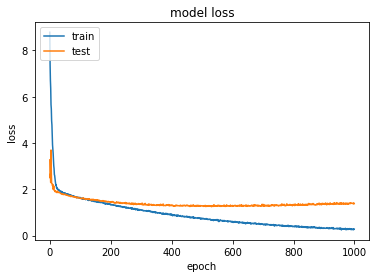

In [63]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Now let's plot the accuracy

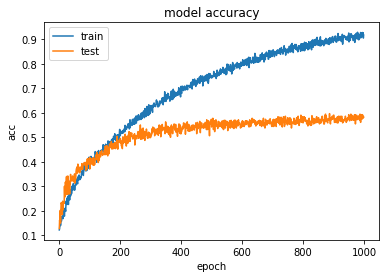

In [64]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
predictions = model.predict(x_testcnn)

y_predictions = []
for prediction in predictions:
  y_predictions.append(int(tf.argmax(prediction)))

In [66]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           1       0.36      0.31      0.33        26
           2       0.68      0.75      0.72        65
           3       0.61      0.50      0.55        62
           4       0.43      0.41      0.42        64
           5       0.55      0.67      0.60        63
           6       0.72      0.68      0.70        71
           7       0.56      0.65      0.60        60
           8       0.61      0.52      0.56        65

    accuracy                           0.58       476
   macro avg       0.56      0.56      0.56       476
weighted avg       0.58      0.58      0.58       476



References
1. Jont B. Allen (June 1977). "Short Time Spectral Analysis, Synthesis, and Modification by Discrete Fourier Transform". IEEE Transactions on Acoustics, Speech, and Signal Processing. ASSP-25 (3): 235–238.
2. Enochson, Loren D.; Otnes, Robert K. (1968). Programming and Analysis for Digital Time Series Data. U.S. Dept. of Defense, Shock and Vibration Info. Center. p. 142.
3. http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs
4. https://github.com/soerendip/Tensorflow-binary-classification/blob/master/Tensorflow-binary-classification-model.ipynb
5. https://github.com/yfliao/Emotion-Classification-Ravdess
6. https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html

you can grab the code of this notebook at https://github.com/linerocks/its-guess-lecture-2021